In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,sms or WA,7,14400000,35700000,277706,40.0
1,11,panggilan,35,79000000,160500000,22382611,49.0
2,4,sms or WA,6,7100000,26700000,205389,27.0
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.0
4,22,datang ke tempat,35,346000000,485500000,151035603,71.0


In [5]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

y = df["time_to_collect"]
df.drop("time_to_collect", axis=1, inplace=True)             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,avg_bill_methods
0,-1.347826,-0.459398,-0.520698,-0.252668,-0.363636,0
1,-0.130435,-0.282327,-0.344973,-0.162494,-0.159091,2
2,-1.391304,-0.479408,-0.533371,-0.252963,-0.659091,0
3,1.086957,1.644624,1.393270,1.716301,0.000000,3
4,-0.130435,0.449531,0.112644,0.362330,0.340909,3


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.49
      Mean Absolute Error : 2.46
      Mean Absolute Percentage Error : 201732135272114.25
      Root Mean Squared Error : 201732135272114.25
      R_Squared : 0.87
      


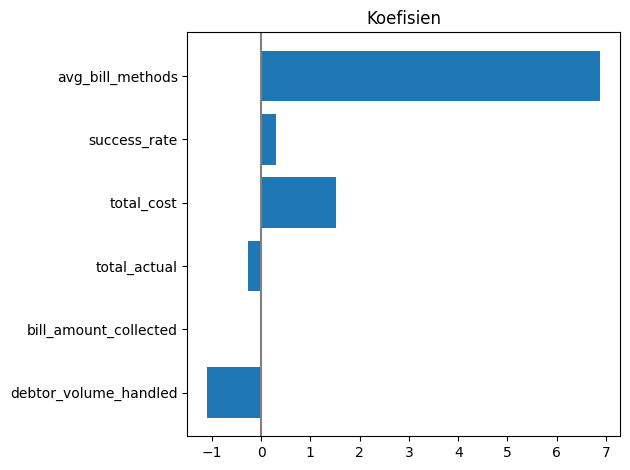

In [9]:
plt.barh(X_train.columns, model.coef_.ravel())
plt.title("Koefisien")
plt.axvline(x=0, color=".5")
plt.tight_layout()
plt.show()

### Avg_bill_methods

In [10]:
model = LinearRegression()
X_train_experiment = X_train["avg_bill_methods"]
X_test_experiment = X_test["avg_bill_methods"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.77
      Mean Absolute Error : 2.53
      Mean Absolute Percentage Error : 136792268428689.16
      Root Mean Squared Error : 136792268428689.16
      R_Squared : 0.87
      


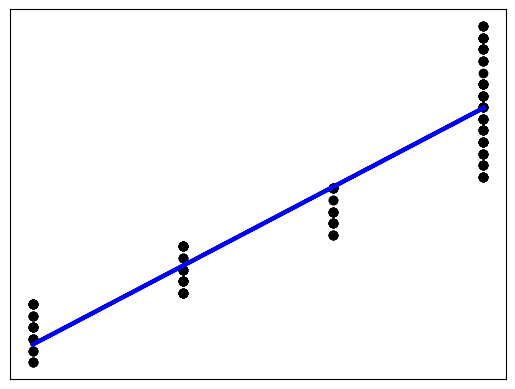

In [12]:
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Success Rate

In [13]:
model = LinearRegression()
X_train_experiment = X_train["success_rate"]
X_test_experiment = X_test["success_rate"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 72.02
      Mean Absolute Error : 7.43
      Mean Absolute Percentage Error : 1328560723230530.50
      Root Mean Squared Error : 1328560723230530.50
      R_Squared : 0.01
      


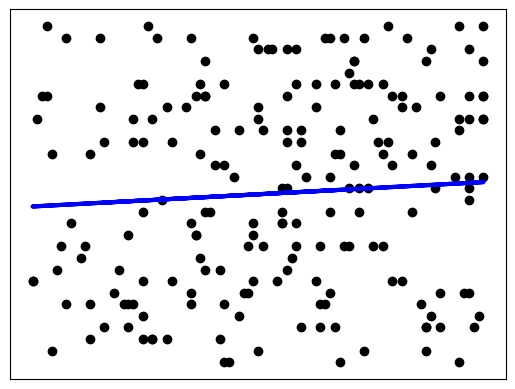

In [15]:
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Total Cost

In [16]:
model = LinearRegression()
X_train_experiment = X_train["total_cost"]
X_test_experiment = X_test["total_cost"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 32.24
      Mean Absolute Error : 4.51
      Mean Absolute Percentage Error : 858993701001679.25
      Root Mean Squared Error : 858993701001679.25
      R_Squared : 0.56
      


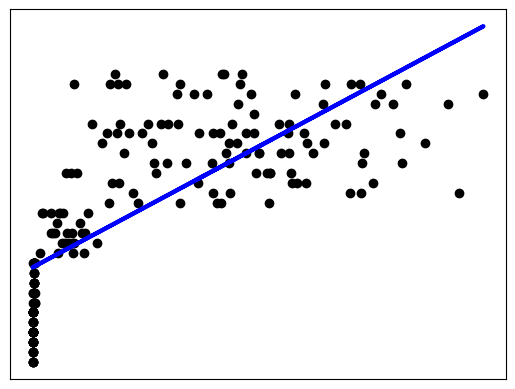

In [18]:
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Total Actual

In [19]:
model = LinearRegression()
X_train_experiment = X_train["total_actual"]
X_test_experiment = X_test["total_actual"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 40.20
      Mean Absolute Error : 5.22
      Mean Absolute Percentage Error : 825747518852753.00
      Root Mean Squared Error : 825747518852753.00
      R_Squared : 0.45
      


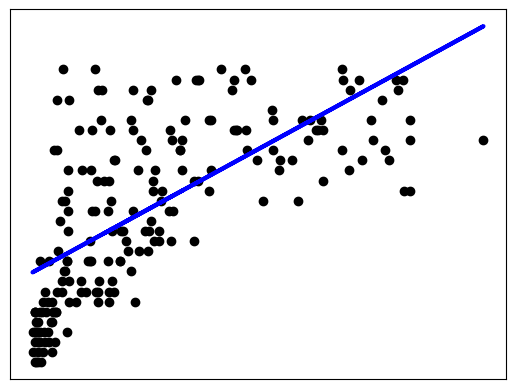

In [21]:
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Bill Amount Collected

In [22]:
model = LinearRegression()
X_train_experiment = X_train["bill_amount_collected"]
X_test_experiment = X_test["bill_amount_collected"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 47.46
      Mean Absolute Error : 5.74
      Mean Absolute Percentage Error : 962031499177423.62
      Root Mean Squared Error : 962031499177423.62
      R_Squared : 0.35
      


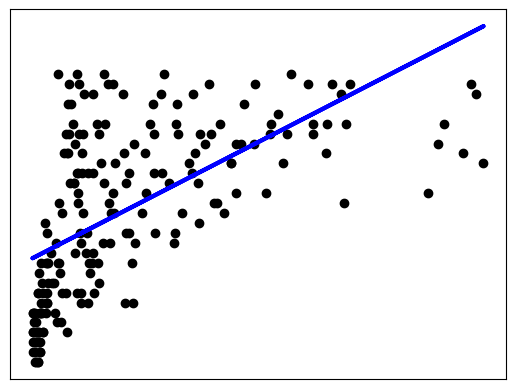

In [24]:
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Debtor Volume Handled

In [25]:
model = LinearRegression()
X_train_experiment = X_train["debtor_volume_handled"]
X_test_experiment = X_test["debtor_volume_handled"]

model.fit(X_train_experiment.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test_experiment.to_numpy().reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 27.71
      Mean Absolute Error : 3.96
      Mean Absolute Percentage Error : 235336357492498.88
      Root Mean Squared Error : 235336357492498.88
      R_Squared : 0.62
      


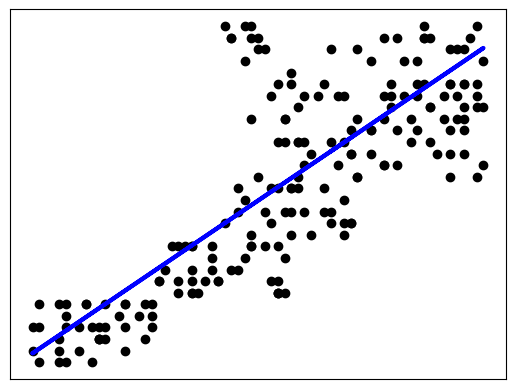

In [27]:
plt.scatter(X_test_experiment, y_test, color="black")
plt.plot(X_test_experiment, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Ridge

In [28]:
y.describe()

count    1000.000000
mean       14.666000
std         8.677427
min         0.000000
25%         7.000000
50%        15.000000
75%        22.000000
max        29.000000
Name: time_to_collect, dtype: float64

In [29]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.48
      Mean Absolute Error : 2.46
      Mean Absolute Percentage Error : 201757125221358.41
      Root Mean Squared Error : 201757125221358.41
      R_Squared : 0.87
      


In [31]:
# Tentukan parameter grid yang akan dijelajahi
param_grid = {
    'fit_intercept': [True, False],
    "copy_X": [True, False],
    "positive": [True, False],
    
}

# Inisialisasi model regresi linier
regression = LinearRegression()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=regression, param_grid=param_grid, cv=5)

# Lakukan pencarian hyperparameter terbaik
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [32]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.22
      Mean Absolute Error : 2.43
      Mean Absolute Percentage Error : 210830386231479.03
      Root Mean Squared Error : 210830386231479.03
      R_Squared : 0.87
      


In [33]:
model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5)
model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=5)

In [34]:
model.best_score_

0.8753744538118126

In [35]:
model.alpha_

1.0

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 9.48
      Mean Absolute Error : 2.46
      Mean Absolute Percentage Error : 201757125221358.41
      Root Mean Squared Error : 201757125221358.41
      R_Squared : 0.87
      


In [37]:
import pickle

pickle.dump(model, open("ridge.pkl", "wb"))

In [40]:
import joblib

load_model = joblib.load('ridge.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


22.21252985731808

In [41]:
y_test.iloc[-1]

18